In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import bayview data
bayview = "https://raw.githubusercontent.com/rgorai22/E11_RishikaKatieVic/main/Bayview_Data"
loc_bayview = pd.read_csv(bayview)
loc_bayview

,Time,Latitude,Longitude,counts,PM1,PM25,PM10,Temperature,Humidity,Pressure,Altitude,VOC
0,1.713396e+09,0,0,27.0,1.0,2.0,3.0,19.011641,51.742875,1018.093250,-40.245558,19005.0
1,1.713396e+09,0,0,32.0,1.0,2.0,3.0,19.120137,51.550548,1018.099809,-40.299962,27221.0
2,1.713396e+09,0,0,32.0,1.0,2.0,3.0,19.219062,51.319246,1018.095427,-40.263612,36170.5
3,1.713396e+09,0,0,33.0,1.0,2.0,3.0,19.298359,51.092071,1018.098300,-40.287442,46449.0
4,1.713396e+09,0,0,29.0,1.5,3.0,3.5,19.365059,50.806837,1018.079211,-40.129124,57363.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1.713400e+09,0,0,29.5,1.5,2.5,3.0,19.386738,52.126247,1017.807928,-37.878948,498268.5
1830,1.713400e+09,0,0,32.0,1.5,2.5,3.0,19.381660,52.065257,1017.803705,-37.843915,494937.5
1831,1.713400e+09,0,0,28.0,2.0,3.0,4.0,19.385176,52.024420,1017.795917,-37.779308,493556.0
1832,1.713400e+09,0,0,28.0,2.0,3.0,4.0,19.396016,51.987687,1017.794400,-37.766725,496162.5


In [3]:
#import berkeley data
berk = "https://raw.githubusercontent.com/rgorai22/E11_RishikaKatieVic/main/Berkeley%201Hr.csv"
loc_berk = pd.read_csv(berk)
loc_berk

,Time,Latitude,Longitude,counts,PM1,PM25,PM10,Temperature,Humidity,Pressure,Altitude,VOC
0,1.712792e+09,0,0,49.5,3.5,6.0,6.0,25.715254,43.746068,1004.731263,71.166948,65833.5
1,1.712792e+09,0,0,50.5,4.5,6.5,6.5,25.772383,43.532948,1004.710235,71.343224,75217.0
2,1.712792e+09,0,0,50.5,4.5,6.5,6.5,25.831074,43.372051,1004.715900,71.295730,83850.5
3,1.712792e+09,0,0,49.0,4.0,7.0,7.0,25.886934,43.168339,1004.728122,71.193276,91425.5
4,1.712792e+09,0,0,50.5,4.0,7.0,7.0,25.936152,42.976234,1004.729447,71.182174,100684.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1828,1.712796e+09,0,0,46.5,5.0,8.0,8.0,26.505684,38.380016,1004.377547,74.132495,410309.5
1829,1.712796e+09,0,0,53.0,4.0,7.0,7.0,26.513496,38.413392,1004.381707,74.097615,411869.0
1830,1.712796e+09,0,0,45.0,4.0,7.0,7.0,26.521895,38.414276,1004.379919,74.112610,411268.5
1831,1.712796e+09,0,0,55.0,4.0,7.0,7.0,26.525215,38.429425,1004.376722,74.139418,411869.0


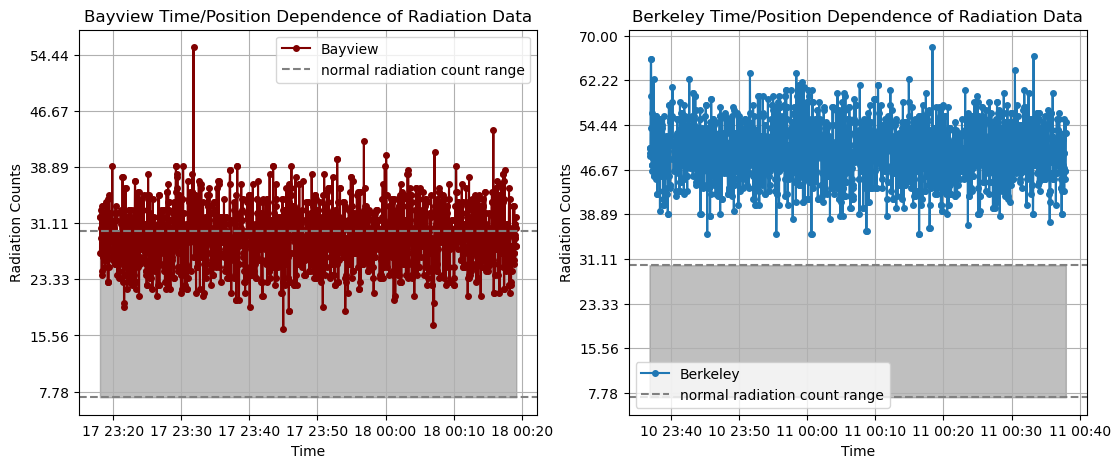

In [39]:
loc_bayview['DateTime'] = pd.to_datetime(loc_bayview['Time'], unit='s')
loc_berk['DateTime'] = pd.to_datetime(loc_berk['Time'], unit='s')

upper_th = 7
lower_th = 30

fig1, ax1 = plt.subplots(figsize=(13,5),ncols=2)
ax1[0].plot(loc_bayview['DateTime'], loc_bayview['counts'], label='Bayview', marker='o', linestyle='-', markersize=4, color ="maroon")
ax1[1].plot(loc_berk['DateTime'], loc_berk['counts'], label='Berkeley', marker='o', linestyle='-', markersize=4)

ax1[0].set_xlabel('Time')
ax1[0].set_ylabel('Radiation Counts')
ax1[0].set_title('Bayview Time/Position Dependence of Radiation Data')
ax1[0].grid(True)
ax1[0].set_yticks(np.linspace(0,70,10))

#bounds for normal radiation counts
ax1[0].fill_between(x=loc_bayview['DateTime'], y1 = upper_th, y2 = lower_th, interpolate=True,color='gray', alpha=0.5)
ax1[0].axhline(7, color="gray",label="normal radiation count range",linestyle='--')
ax1[0].axhline(30, color="gray",linestyle='--')
ax1[0].legend()

ax1[1].set_xlabel('Time')
ax1[1].set_ylabel('Radiation Counts')
ax1[1].set_title('Berkeley Time/Position Dependence of Radiation Data')
ax1[1].grid(True)
ax1[1].set_yticks(np.linspace(0,70,10))

ax1[1].fill_between(x=loc_berk['DateTime'], y1 = upper_th, y2 = lower_th, interpolate=True,color='gray', alpha=0.5)
ax1[1].axhline(7, color="gray",label="normal radiation count range",linestyle='--')
ax1[1].axhline(30, color="gray",linestyle='--')
ax1[1].legend()
#ax[1].tight_layout()


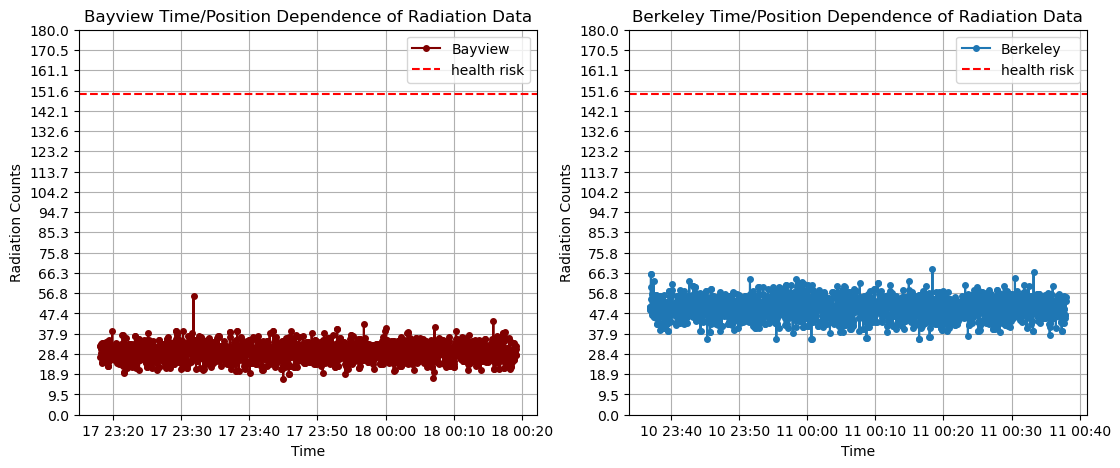

In [37]:
loc_bayview['DateTime'] = pd.to_datetime(loc_bayview['Time'], unit='s')
loc_berk['DateTime'] = pd.to_datetime(loc_berk['Time'], unit='s')

upper_th = 7
lower_th = 30

fig1, ax1 = plt.subplots(figsize=(13,5),ncols=2)
ax1[0].plot(loc_bayview['DateTime'], loc_bayview['counts'], label='Bayview', marker='o', linestyle='-', markersize=4, color ="maroon")
ax1[1].plot(loc_berk['DateTime'], loc_berk['counts'], label='Berkeley', marker='o', linestyle='-', markersize=4)

ax1[0].set_xlabel('Time')
ax1[0].set_ylabel('Radiation Counts')
ax1[0].set_title('Bayview Time/Position Dependence of Radiation Data')
ax1[0].grid(True)
ax1[0].set_yticks(np.linspace(0,180,20))

#bounds for normal radiation counts
ax1[0].axhline(150, color="red",label="health risk",linestyle='--')
ax1[0].legend()

ax1[1].set_xlabel('Time')
ax1[1].set_ylabel('Radiation Counts')
ax1[1].set_title('Berkeley Time/Position Dependence of Radiation Data')
ax1[1].grid(True)
ax1[1].set_yticks(np.linspace(0,180,20))

ax1[1].axhline(150, color="red",label="health risk",linestyle='--')
ax1[1].legend()
#ax[1].tight_layout()


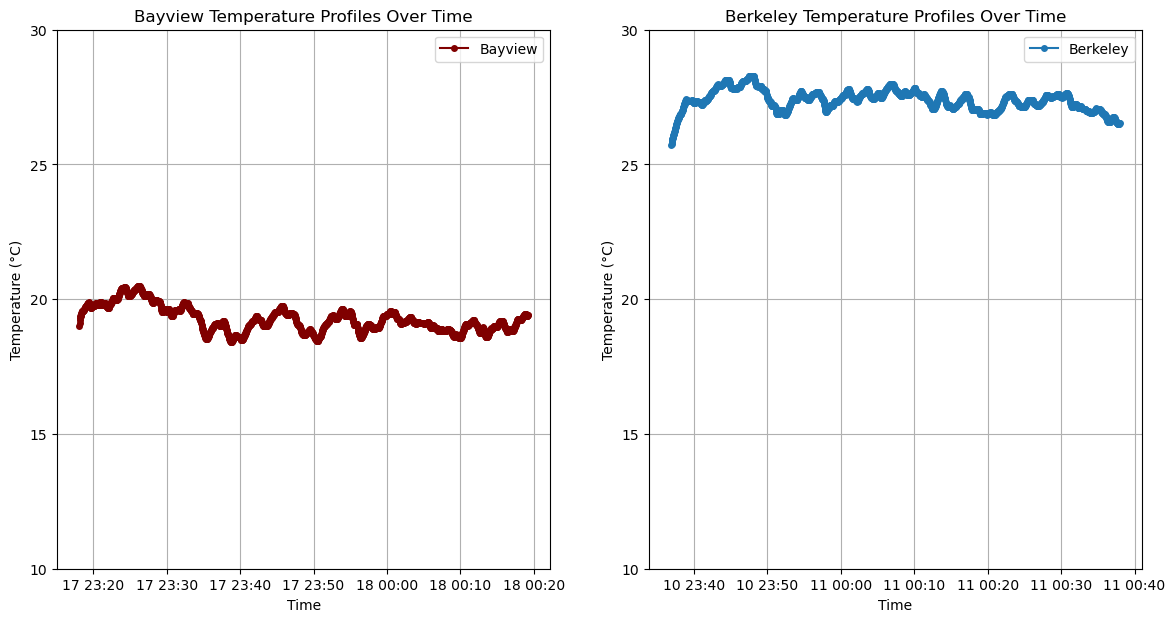

In [10]:
#Temperature
fig2, ax2 = plt.subplots(figsize=(14, 7),ncols=2)
ax2[0].plot(loc_bayview['DateTime'], loc_bayview['Temperature'], label='Bayview', marker='o', linestyle='-', markersize=4, color = 'maroon')
ax2[1].plot(loc_berk['DateTime'], loc_berk['Temperature'], label='Berkeley', marker='o', linestyle='-', markersize=4)

ax2[0].set_xlabel('Time')
ax2[0].set_ylabel('Temperature (°C)')
ax2[0].set_title('Bayview Temperature Profiles Over Time')
ax2[0].legend()
ax2[0].grid(True)
ax2[0].set_yticks(np.linspace(10,30,5))
#ax[0].tight_layout()

ax2[1].set_xlabel('Time')
ax2[1].set_ylabel('Temperature (°C)')
ax2[1].set_title('Berkeley Temperature Profiles Over Time')
ax2[1].legend()
ax2[1].grid(True)
ax2[1].set_yticks(np.linspace(10,30,5))

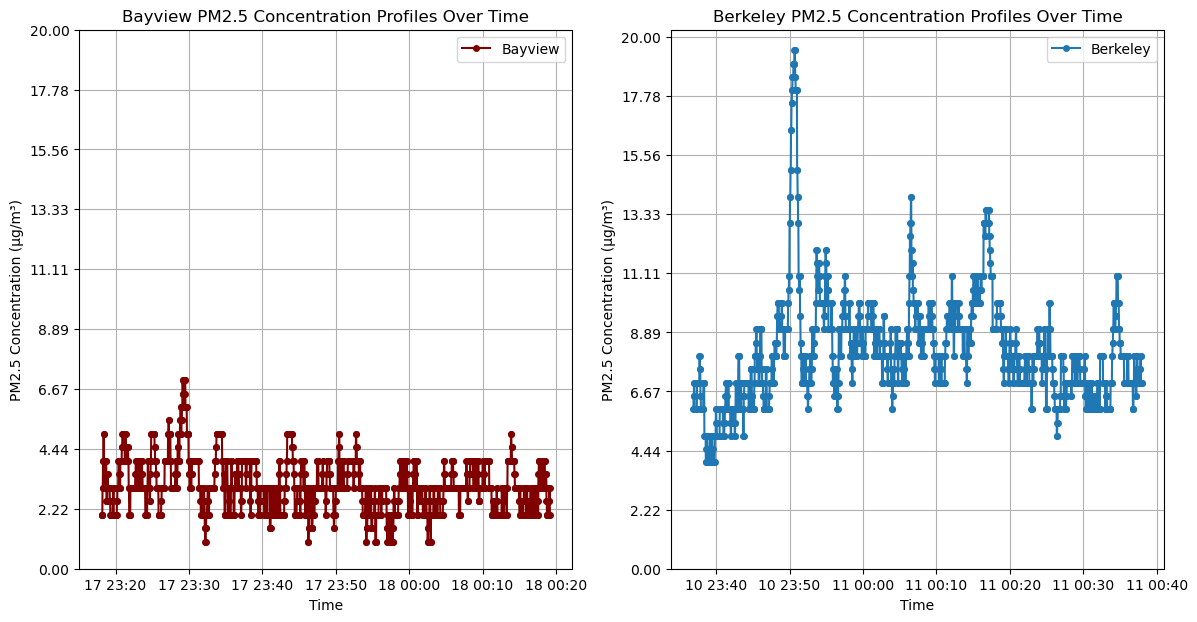

In [11]:
#Humidity
fig3, ax3 = plt.subplots(figsize=(14, 7),ncols=2)
ax3[0].plot(loc_bayview['DateTime'], loc_bayview['PM25'], label='Bayview', marker='o', linestyle='-', markersize=4, color = 'maroon')
ax3[1].plot(loc_berk['DateTime'], loc_berk['PM25'], label='Berkeley', marker='o', linestyle='-', markersize=4)

ax3[0].set_xlabel('Time')
ax3[0].set_ylabel('PM2.5 Concentration (µg/m³)')
ax3[0].set_title('Bayview PM2.5 Concentration Profiles Over Time')
ax3[0].legend()
ax3[0].grid(True)
ax3[0].set_yticks(np.linspace(0,20,10))
#ax[0].tight_layout()

ax3[1].set_xlabel('Time')
ax3[1].set_ylabel('PM2.5 Concentration (µg/m³)')
ax3[1].set_title('Berkeley PM2.5 Concentration Profiles Over Time')
ax3[1].legend()
ax3[1].grid(True)
ax3[1].set_yticks(np.linspace(0,20,10))

Radiation Counts - Bayview Mean: 29.22, Bayview Standard Deviation: 3.91
Radiation Counts - Berkeley Mean: 49.74, Berkeley Standard Deviation: 4.96
PM2.5 Concentration - Bayview Mean: 3.11, Bayview Standard Deviation: 0.95
PM2.5 Concentration - Berkeley Mean: 8.18, Berkeley Standard Deviation: 2.08
Temperature - Bayview Mean: 19.26, Bayview Standard Deviation: 0.47
Temperature - Berkeley Mean: 27.39, Berkeley Standard Deviation: 0.38


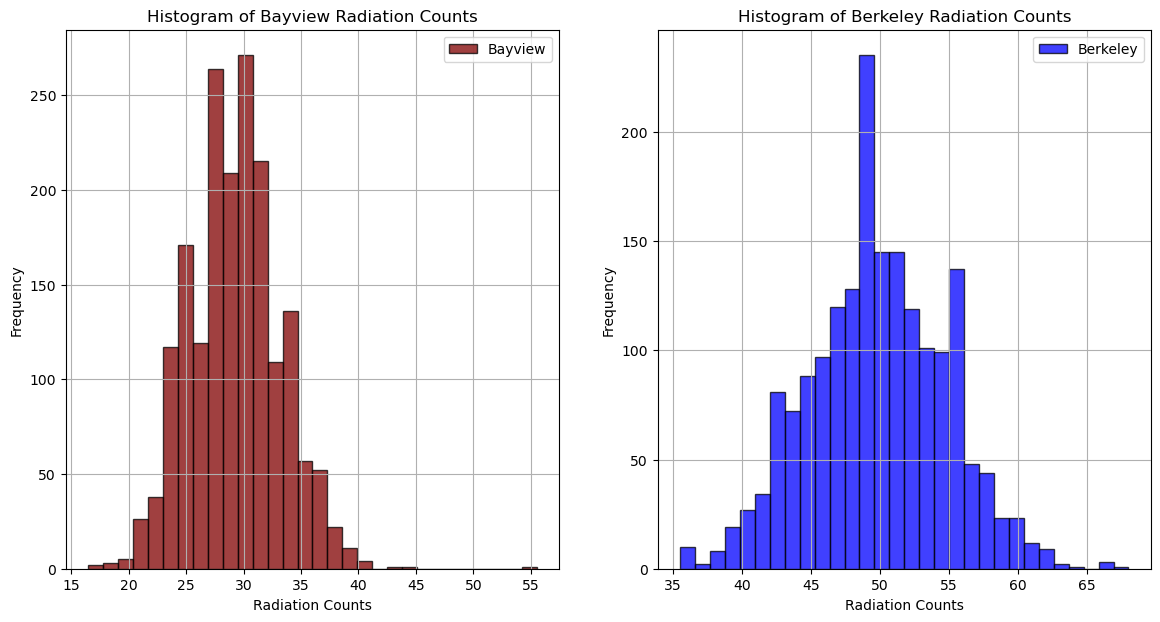

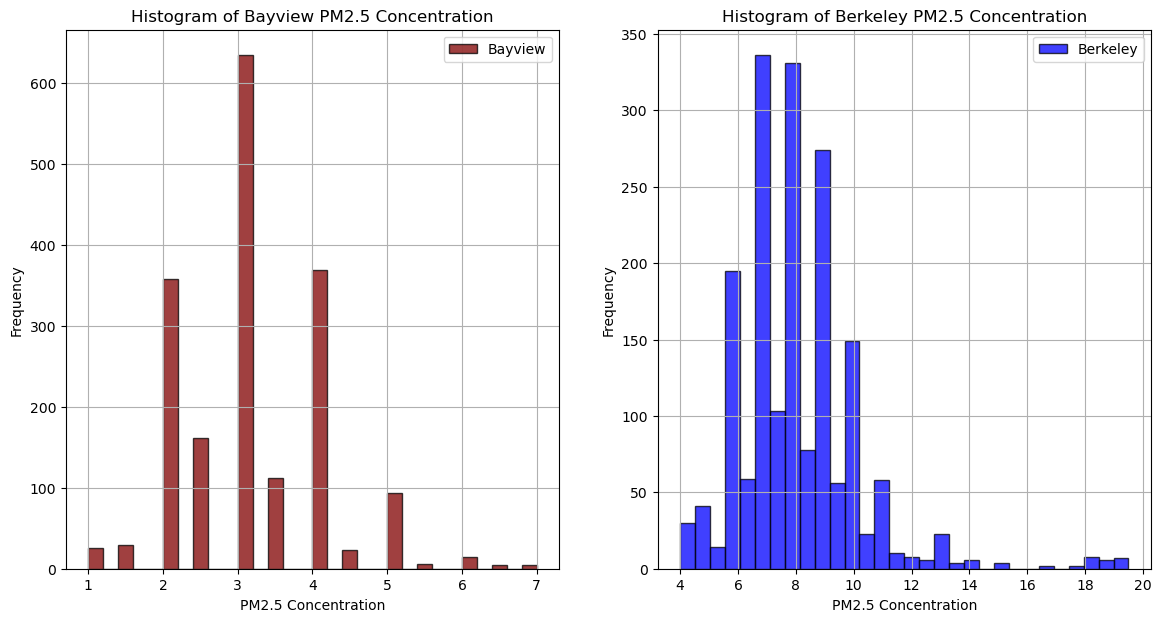

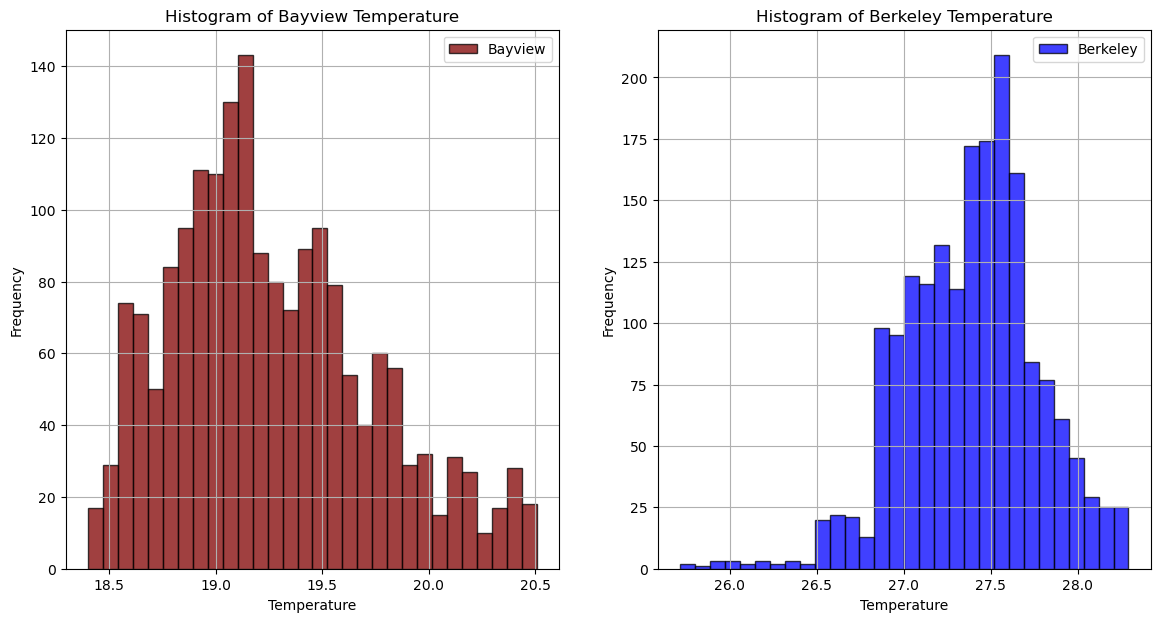

In [12]:
#histogram of Bayview counts
bay_count = loc_bayview['counts']
berk_count = loc_berk['counts']
bay_pm25 = loc_bayview['PM25']
berk_pm25 = loc_berk['PM25']
bay_temp = loc_bayview['Temperature']
berk_temp = loc_berk['Temperature']

baymeans = []
berkmeans = []

baystds = []
berkstds = []

def plot_histogram_and_stats(baydata, berkdata, title):
    fig, ax = plt.subplots(figsize=(14,7),ncols=2)
    ax[0].hist(baydata, bins=30, alpha=0.75, color='maroon', edgecolor='black',label="Bayview")
    ax[1].hist(berkdata, bins=30, alpha=0.75, color='blue', edgecolor='black',label="Berkeley")
    ax[0].set_title(f'Histogram of Bayview {title}')
    ax[0].set_xlabel(title)
    ax[0].set_ylabel('Frequency')
    ax[0].legend()
    ax[0].grid(True)
    
    ax[1].set_xlabel(title)
    ax[1].set_ylabel('Frequency')
    ax[1].grid(True)
    ax[1].set_title(f'Histogram of Berkeley {title}')
    ax[1].legend()


    baymean = np.mean(baydata)
    baystd_dev = np.std(baydata)
    berkmean = np.mean(berkdata)
    berkstd_dev = np.std(berkdata)
    print(f"{title} - Bayview Mean: {baymean:.2f}, Bayview Standard Deviation: {baystd_dev:.2f}")
    print(f"{title} - Berkeley Mean: {berkmean:.2f}, Berkeley Standard Deviation: {berkstd_dev:.2f}")
    baymeans.append(baymean)
    berkmeans.append(berkmean)
    baystds.append(baystd_dev)
    berkstds.append(berkstd_dev)
    

plot_histogram_and_stats(bay_count, berk_count,'Radiation Counts')

plot_histogram_and_stats(bay_pm25,berk_pm25, 'PM2.5 Concentration')

plot_histogram_and_stats(bay_temp, berk_temp,'Temperature')

In [13]:
#expected vs actual for Bayview
baymean_counts = baymeans[0]

bayexpected_std_dev = np.sqrt(baymean_counts)

bayactual_std_dev = np.std(bay_count)

print(f"Bayview Mean Radiation Counts: {baymean_counts:.2f}")
print(f"Bayview Expected Standard Deviation (Counting Statistics): {bayexpected_std_dev:.2f}")
print(f"Bayview Actual Measured Standard Deviation: {bayactual_std_dev:.2f}")

if abs(bayexpected_std_dev - bayactual_std_dev) < bayexpected_std_dev * 0.1:
    print("The actual standard deviation is close to the expected, indicating counting statistics might dominate.")
else:
    print("There is significant deviation from counting statistics, suggesting other factors are influencing variability.")

Bayview Mean Radiation Counts: 29.22
Bayview Expected Standard Deviation (Counting Statistics): 5.41
Bayview Actual Measured Standard Deviation: 3.91
There is significant deviation from counting statistics, suggesting other factors are influencing variability.


In [14]:
#expected vs actual for Berkeley
berkmean_counts = berkmeans[0]

berkexpected_std_dev = np.sqrt(berkmean_counts)

berkactual_std_dev = np.std(berk_count)

print(f"Berkeley Mean Radiation Counts: {berkmean_counts:.2f}")
print(f"Berkeley Expected Standard Deviation (Counting Statistics): {berkexpected_std_dev:.2f}")
print(f"Berkeley Actual Measured Standard Deviation: {berkactual_std_dev:.2f}")

if abs(berkexpected_std_dev - berkactual_std_dev) < berkexpected_std_dev * 0.1:
    print("The actual standard deviation is close to the expected, indicating counting statistics might dominate.")
else:
    print("There is significant deviation from counting statistics, suggesting other factors are influencing variability.")

Berkeley Mean Radiation Counts: 49.74
Berkeley Expected Standard Deviation (Counting Statistics): 7.05
Berkeley Actual Measured Standard Deviation: 4.96
There is significant deviation from counting statistics, suggesting other factors are influencing variability.


In [15]:
from scipy.stats import ttest_ind

n_bay = len(loc_bayview['counts'])

n_berk = len(loc_berk['counts'])

sem_bay = bayactual_std_dev / np.sqrt(n_bay)
sem_berk = berkactual_std_dev / np.sqrt(n_berk)

t_stat, p_val = ttest_ind(loc_bayview['counts'], loc_berk['counts'])

print(f"Mean Counts Bayview: {baymeans[0]:.2f} ± {sem_bay:.2f}")
print(f"Mean Counts Berkeley: {berkmeans[0]:.2f} ± {sem_berk:.2f}")

print(f"Bayview vs Berkeley: p-value = {p_val:.3f}")

radiation_health_threshold = 0.5
significant_difference = radiation_health_threshold

diff = abs(berkmeans[0] - baymeans[0])

print(f"Difference between Bayview and Berkeley is {'significant' if diff > significant_difference else 'not significant'}.")

Mean Counts Bayview: 29.22 ± 0.09
Mean Counts Berkeley: 49.74 ± 0.12
Bayview vs Berkeley: p-value = 0.000
Difference between Bayview and Berkeley is significant.
